In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import arcsine, norm
%matplotlib inline

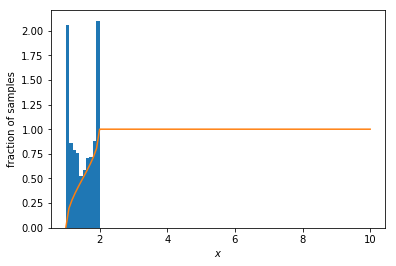

In [68]:
# Выбираем распределение Арксинуса
arcsin_rv = arcsine(1)

# Генерируем выборку объемом в 1000
selection = arcsin_rv.rvs(size=1000)

# Строим Гистограмму из нашей выборки
# !!! Note: заменил normed на density т.к. использую python 3.7 с более новой версией Matplotlib
plt.hist(selection, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

# Строим функцию распределения
x = np.linspace(1,10,100)
cdf = arcsin_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')


#### Расчет дисперсии и среднего по начальной выборке

In [69]:
initialDispersion = np.var(selection)
initialAvg = np.mean(selection)

print(initialDispersion)
print(initialAvg)

# Дисперсия по начальной выборке = 0.1266130641242096
# Среднее выборочное по начально выборке = 1.5037360790556908

0.12528116147371685
1.5003831364682219


#### Подсчет значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних

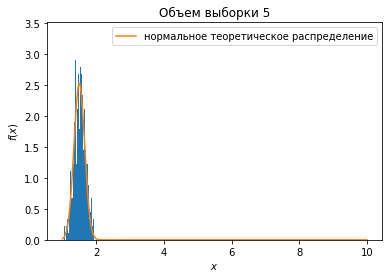

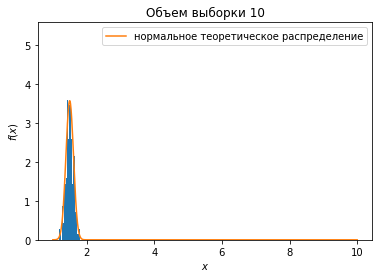

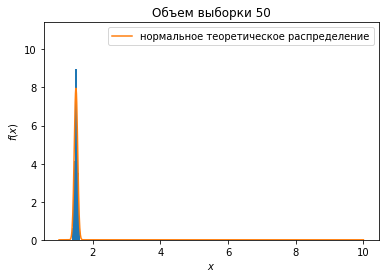

In [71]:
import math

for n in [5, 10, 50]:
    # 1000 средних от выборки объемом n
    sample = [arcsin_rv.rvs(n).mean() for i in range(1000)]
    # гистограма результата
    plt.hist(sample, 100, density=True)
    
    # точки для графика
    x = np.linspace(1, 10, 1000)
    # Среднее выборочное по начально выборке
    loc = 1.5
    # Дисперсия    
    std = 0.125/n
    # нормальное распределение от результатов экспоненциального распределения(?)
    norm = sts.norm.pdf(x, loc, math.sqrt(std))
                           
    # отрисовываем результат
    plt.plot(x, norm, label='нормальное теоретическое распределение')
    plt.legend()
    plt.title(f'Объем выборки {n}')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

#### Вывод: Чем выше объем, тем больше точность аппроксимации